<a href="https://colab.research.google.com/github/xoro-o/colab--11/blob/main/Some_PyTorch_Stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.arange(10,dtype='float32').reshape((10,1))
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],dtype='float32')

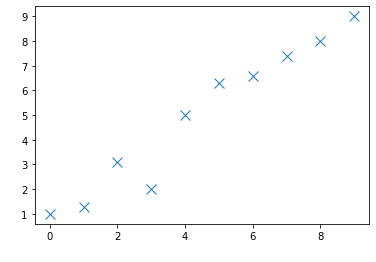

In [10]:
plt.plot(X_train,y_train,'x',markersize=10)  
plt.xlabel('x',color='white')
plt.ylabel('y',color='white')
plt.show()

In [16]:
# now we standardize and create tensors for the input and labels
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
X_train_norm = (X_train-np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm,y_train)
batch_size = 1
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [17]:
torch.manual_seed(1)
weight = torch.rand(1)
weight.requires_grad_()
bias = torch.zeros(1,requires_grad = True)
def model(x_batch):
  return x_batch @ weight + bias

In [19]:
def loss_fn(input,target):
  return (input-target).pow(2).mean()

In [21]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
  for x_batch,y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred,y_batch)
    loss.backward()
  with torch.no_grad():
    weight -= weight.grad*learning_rate
    bias -= bias.grad*learning_rate
    weight.grad.zero_()
    bias.grad.zero_()
  if(epoch % log_epochs):
    print(f'Epoch {epoch}, loss {loss.item():.4f}')


Epoch 1, loss 12.7045
Epoch 2, loss 42.2612
Epoch 3, loss 31.6346
Epoch 4, loss 11.4468
Epoch 5, loss 3.5311
Epoch 6, loss 35.7048
Epoch 7, loss 34.2280
Epoch 8, loss 3.3678
Epoch 9, loss 38.5479
Epoch 11, loss 24.3872
Epoch 12, loss 34.0026
Epoch 13, loss 21.4849
Epoch 14, loss 31.2694
Epoch 15, loss 2.1533
Epoch 16, loss 2.5655
Epoch 17, loss 18.4224
Epoch 18, loss 19.3631
Epoch 19, loss 25.3449
Epoch 21, loss 18.1422
Epoch 22, loss 0.7659
Epoch 23, loss 16.7578
Epoch 24, loss 16.1060
Epoch 25, loss 5.6720
Epoch 26, loss 13.0648
Epoch 27, loss 14.5280
Epoch 28, loss 1.0872
Epoch 29, loss 8.8481
Epoch 31, loss 1.5720
Epoch 32, loss 4.5438
Epoch 33, loss 11.2783
Epoch 34, loss 13.4183
Epoch 35, loss 10.4216
Epoch 36, loss 8.9575
Epoch 37, loss 1.3032
Epoch 38, loss 0.6146
Epoch 39, loss 8.0068
Epoch 41, loss 3.4524
Epoch 42, loss 9.2393
Epoch 43, loss 5.5944
Epoch 44, loss 6.6489
Epoch 45, loss 8.3586
Epoch 46, loss 0.9937
Epoch 47, loss 2.8949
Epoch 48, loss 5.7801
Epoch 49, loss 0.91

In [34]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size,output_size)
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

In [36]:
for epoch in range(num_epochs):
  for x,y in train_dl:
    pred = model(x)[:,0]
    loss = loss_fn(pred,y)
    loss.backward()
    optimizer.step() 
    optimizer.zero_grad()
  if(epoch%10 ==0):
    print(f'Epoch : {epoch} loss : {loss.item():.4f}')

Epoch : 0 loss : 0.1086
Epoch : 10 loss : 0.1012
Epoch : 20 loss : 0.0268
Epoch : 30 loss : 0.0217
Epoch : 40 loss : 0.2994
Epoch : 50 loss : 0.0860
Epoch : 60 loss : 0.7993
Epoch : 70 loss : 0.1274
Epoch : 80 loss : 0.0584
Epoch : 90 loss : 0.0793
Epoch : 100 loss : 0.0085
Epoch : 110 loss : 0.2634
Epoch : 120 loss : 2.4092
Epoch : 130 loss : 0.7554
Epoch : 140 loss : 0.2588
Epoch : 150 loss : 0.7508
Epoch : 160 loss : 0.0494
Epoch : 170 loss : 0.0756
Epoch : 180 loss : 0.0487
Epoch : 190 loss : 0.1382
Epoch : 200 loss : 0.0482
Epoch : 210 loss : 0.7439
Epoch : 220 loss : 2.4309
Epoch : 230 loss : 0.0443
Epoch : 240 loss : 0.0721
Epoch : 250 loss : 0.2384
Epoch : 260 loss : 0.0446
Epoch : 270 loss : 0.0056
Epoch : 280 loss : 0.7416
Epoch : 290 loss : 0.2527
Epoch : 300 loss : 0.2382
Epoch : 310 loss : 0.0744
Epoch : 320 loss : 0.1393
Epoch : 330 loss : 0.1392
Epoch : 340 loss : 0.0056
Epoch : 350 loss : 0.0726
Epoch : 360 loss : 0.0745
Epoch : 370 loss : 0.0056
Epoch : 380 loss : 0.13

In [37]:
print(f'Parameters : ',model.weight.item(),model.bias.item())

Parameters :  2.706899404525757 4.9699201583862305


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [2]:
y = iris['target']
X = iris['data']

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1./3,random_state = 1)

In [5]:
import torch.nn as nn
import torch
import numpy as np
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm,y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [9]:
class Model(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size,hidden_size)
    self.layer2 = nn.Linear(hidden_size,output_size)
  def forward(self,x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x 
  

In [10]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size,hidden_size,output_size)


In [11]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [13]:
#sequential api 
class MyModule(nn.Module):
  def __init__(self):
    super().__init__()
    l1 = nn.Linear(2,4)
    a1 = nn.ReLU()
    l2 = nn.Linear(4,4)
    a2 = nn.ReLU()
    l3 = nn.Linear(4,1)
    a3 = nn.Sigmoid()
    l = [l1,a1,l2,a2,l3,a3]
    self.module_list = nn.ModuleList(l)
  def forward(self,x):
    for f in self.module_list :
      x = f(x)
    return x


model = MyModule()
model


MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [14]:
#custom layers!
#here we created a new layer that was not supported by PyTorch 
#now we can create new models that use these layer
class NoisyLayer(nn.Module):
  def __init__(self,input_size,output_size,noise=0.01):
    super().__init__()
    w = torch.tensor(input_size,output_size)
    self.w = nn.Parameter(w)
    nn.init.xavier_uniform_(self.w)
    b = torch.tensor(output_size).fill_(0)
    self.b = nn.Parameter(b)
    self.noise = noise
  def forward(self,x,training=False):
    if training:
      noise = torch.normal(0.0,self.noise,x.shape)
      x_new = torch.add(x,noise)
    else:
      x_new = x
    return torch.add(torch.matmul(x_new,self.w),self.b)


In [15]:
#lets create a new model using sequential method which uses the newly created NoisyLayer
class MyNoisyModule(nn.Module):
  def __init__(self):
    # creating a NoisyLayer __init__
    self.l1 = NoisyLayer(2,4,0.07)
    #
    self.a1 = nn.ReLU()
    self.l2 = nn.Linear(4,3)
    self.a2 = nn.ReLU()
    self.l3 = nn.Linear(3,2)
    self.a3 = nn.Sigmoid()
  def forward(self,x,training = False):
    #calling forward pass for noisy layer
    x = self.l1(x,training)
    #
    x = self.a1(x)
    x = self.l2(x)
    x = self.a2(x)
    x = self.l3(x)
    x = self.a3(x)
    return x
  def predict(self,x):
    x = torch.tensor(x,dtype = torch.float32)
    pred = self.forward(x)
    return (pred>=0.5).float()
    
